In [38]:
import pandas as pd
import numpy as np
import json 
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [3]:
with open('state_timeseries.json') as json_file: 
    dictionary = json.load(json_file) 

In [7]:
dictionary

{'12': {'andaman & nicobar islands': 0.0,
  'andhra pradesh': 0.0357491698,
  'arunachal pradesh': 0.0,
  'assam': 0.023255814,
  'bihar': 0.0568181818,
  'chandigarh': 0.0,
  'chhattisgarh': 0.0920245399,
  'delhi': 0.0605786618,
  'goa': 0.0,
  'gujarat': 0.1055634807,
  'haryana': 0.1398963731,
  'himachal pradesh': 0.0,
  'jammu & kashmir': 0.0353535354,
  'jharkhand': 0.0859375,
  'karnataka': 0.0382531604,
  'kerala': 0.0367713004,
  'madhya pradesh': 0.0913043478,
  'maharashtra': 0.1210653753,
  'manipur': 0.0,
  'meghalaya': 0.0,
  'mizoram': 0.0,
  'nagaland': 0.0,
  'orissa': 0.0267379679,
  'pondicherry': 0.0,
  'punjab': 0.0663265306,
  'rajasthan': 0.0673758865,
  'sikkim': 0.0,
  'tamil nadu': 0.0341449762,
  'telangana': 0.0,
  'tripura': 0.0,
  'uttar pradesh': 0.1074380165,
  'uttaranchal': 0.0,
  'west bengal': 0.0344827586},
 '13': {'andaman & nicobar islands': 0.0,
  'andhra pradesh': 0.0262789613,
  'arunachal pradesh': 0.0,
  'assam': 0.0309278351,
  'bihar': 0.0

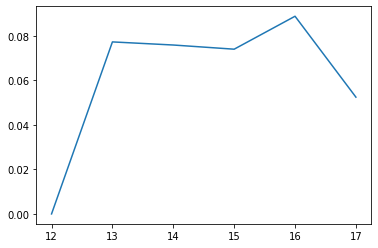

In [9]:
# Check the plot for west bengal over 6 years
west_bengal_values=[]
years=[]
for i in range(12,18):
    years.append(i)
    west_bengal_values.append(dictionary[str(i)]["west bengal"])

plt.plot(years, west_bengal_values)

In [11]:
# importing the sgdp_growthrates csv
sgdp = pd.read_csv("SGDP_growthrates.csv")
sgdp.head(100)

,Sl.\nNo.,State\UT,2000-2001,2001-2002,2002-2003,2003-2004,2004-2005,2005-06,2006-07,2007-08,...,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20
0,1.0,Andhra Pr.,12.37,8.28,6.63,13.72,11.46,9.53,17.92,22.00,...,17.03,13.25,8.43,12.85,13.08,15.10,13.27,15.89,8.80,NaN
1,2.0,Arunachal Pr.,10.86,17.74,-1.57,14.34,20.48,7.65,9.40,17.09,...,20.70,19.44,13.41,16.22,23.17,3.06,7.22,13.04,9.68,NaN
2,3.0,Assam,5.69,4.07,13.30,8.98,11.05,11.21,8.94,9.87,...,17.41,11.73,9.56,13.31,10.11,16.47,11.59,13.49,12.24,NaN
3,4.0,Bihar,14.09,0.72,12.67,1.86,11.30,6.05,22.12,12.85,...,24.94,19.51,14.25,12.30,8.15,8.35,13.65,14.78,15.01,NaN
4,5.0,Jharkhand,-6.50,9.27,8.26,11.80,20.91,11.53,25.28,20.01,...,20.18,20.90,12.30,16.52,6.91,2.83,12.02,11.57,9.66,NaN
5,6.0,Goa,6.75,5.03,14.13,14.83,23.45,12.70,15.33,18.41,...,15.38,28.72,-10.02,-5.77,33.11,15.14,15.27,11.08,9.41,NaN
6,7.0,Gujarat,1.16,11.19,14.53,18.76,12.52,20.34,15.92,16.07,...,20.93,14.82,17.69,11.47,14.13,11.63,13.43,13.79,13.09,NaN
7,8.0,Haryana,13.25,12.58,10.72,14.25,12.91,13.66,18.23,17.76,...,16.56,14.61,16.63,15.05,9.49,13.35,13.34,15.67,13.02,13.27
8,9.0,Himachal Pr.,10.98,9.49,10.25,9.61,11.32,12.67,11.60,12.19,...,19.22,13.06,13.89,14.42,9.51,10.09,9.97,11.92,8.94,NaN
9,10.0,J & K,6.64,8.02,12.68,9.19,9.33,9.58,11.06,11.64,...,20.02,17.41,11.35,9.73,2.87,19.11,7.01,9.61,12.34,NaN


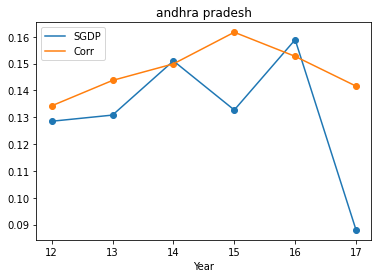

Mean Prediction Error: 16.95 %


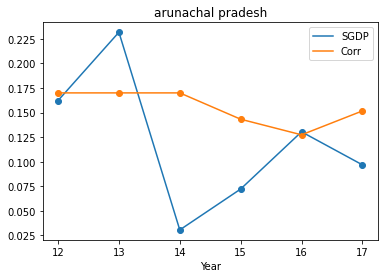

Mean Prediction Error: 107.39 %


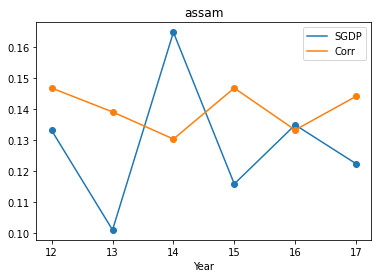

Mean Prediction Error: 19.04 %


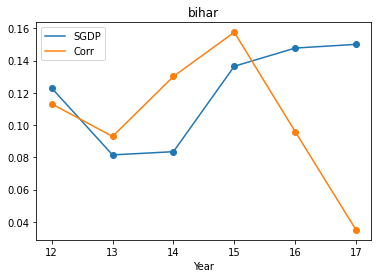

Mean Prediction Error: 34.20 %


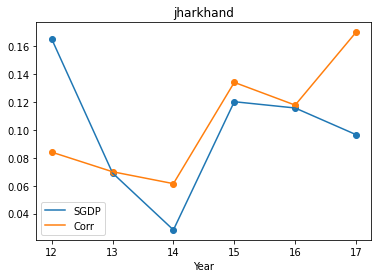

Mean Prediction Error: 42.82 %


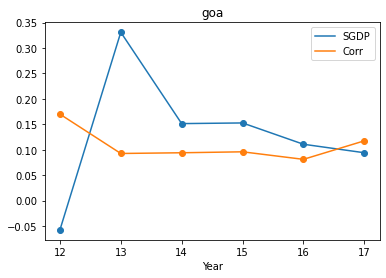

Mean Prediction Error: 98.89 %


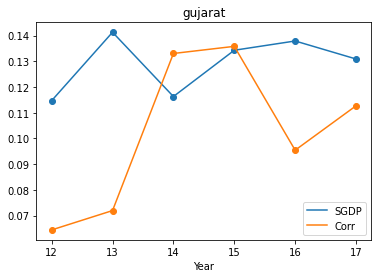

Mean Prediction Error: 25.52 %


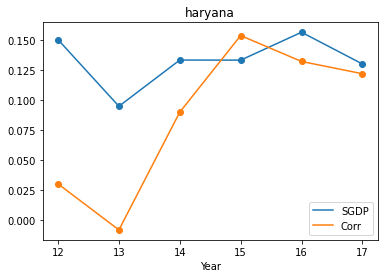

Mean Prediction Error: 43.10 %


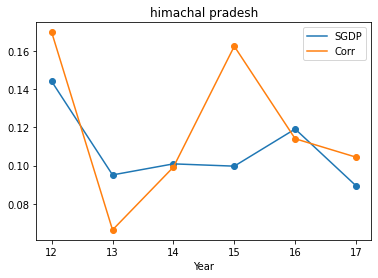

Mean Prediction Error: 22.36 %


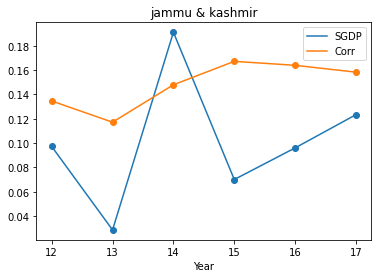

Mean Prediction Error: 101.12 %


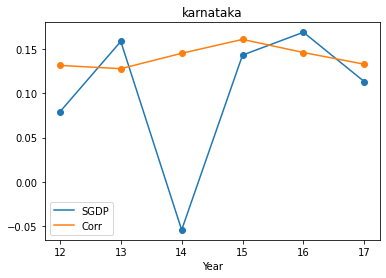

Mean Prediction Error: 82.66 %


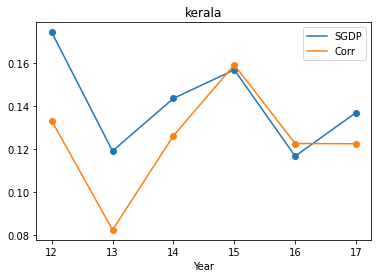

Mean Prediction Error: 13.95 %


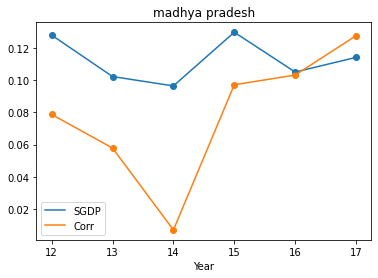

Mean Prediction Error: 35.54 %


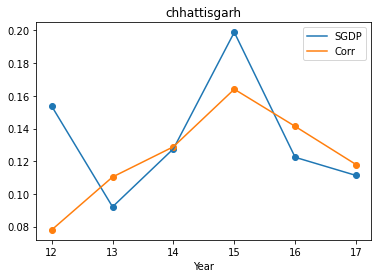

Mean Prediction Error: 18.17 %


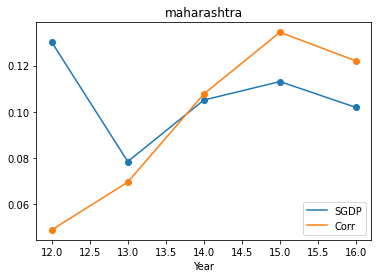

Mean Prediction Error: 22.97 %


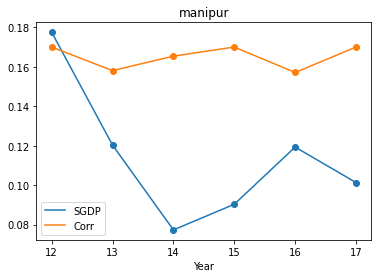

Mean Prediction Error: 56.22 %


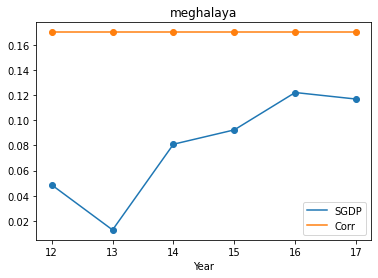

Mean Prediction Error: 290.90 %


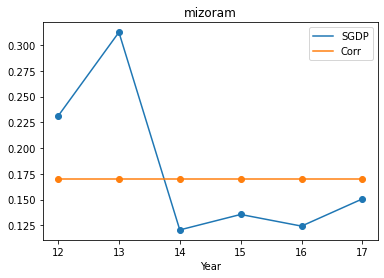

Mean Prediction Error: 31.32 %


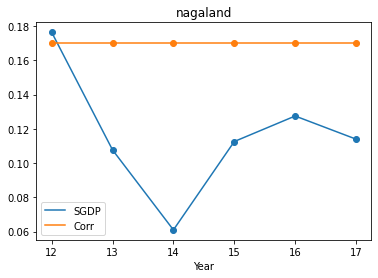

Mean Prediction Error: 62.27 %


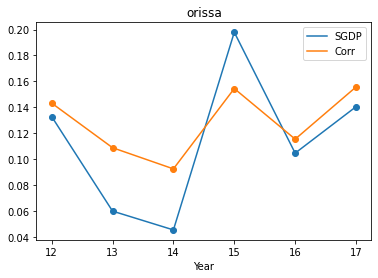

Mean Prediction Error: 39.29 %


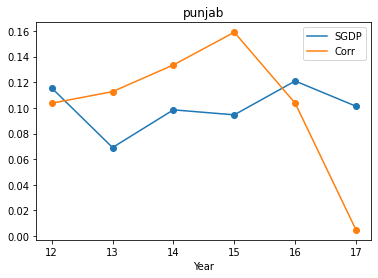

Mean Prediction Error: 47.77 %


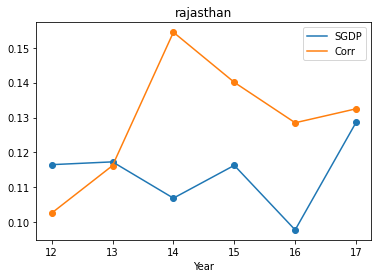

Mean Prediction Error: 18.70 %


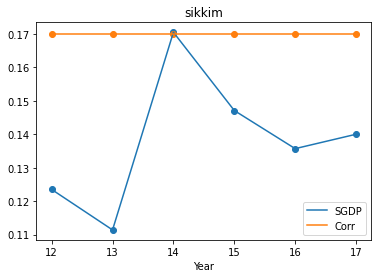

Mean Prediction Error: 25.47 %


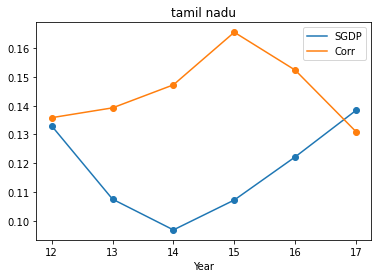

Mean Prediction Error: 28.06 %


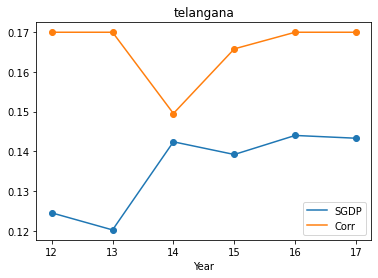

Mean Prediction Error: 23.13 %


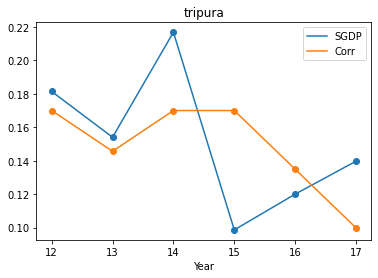

Mean Prediction Error: 24.45 %


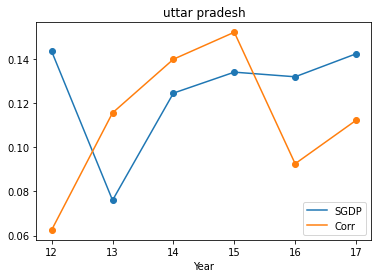

Mean Prediction Error: 30.88 %


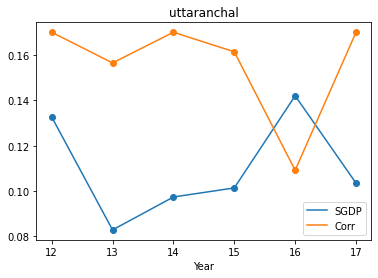

Mean Prediction Error: 56.32 %


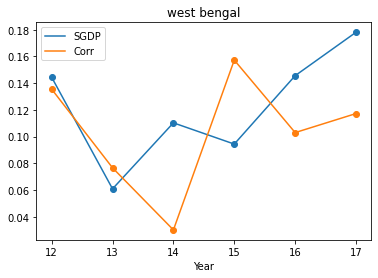

Mean Prediction Error: 39.11 %


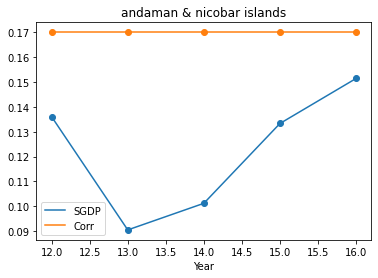

Mean Prediction Error: 44.13 %


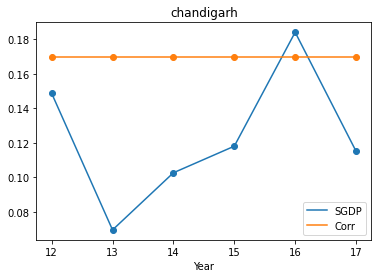

Mean Prediction Error: 53.88 %


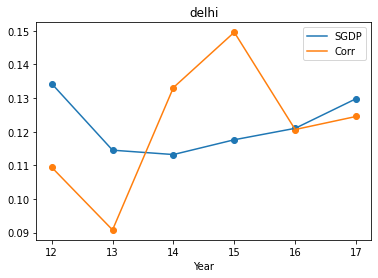

Mean Prediction Error: 14.73 %


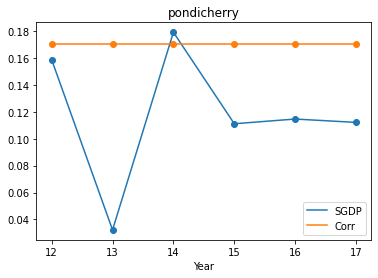

Mean Prediction Error: 98.86 %


In [52]:
count=0
# iterate over all states
for state in dictionary["12"]:
    
    state_gdp_val=[]
    state_year =[]
    state_corruption=[]
    
    # for each state we go over the 6 years
    for year in range(12,18):
        
        # naming the column in the format given in the csv file
        column= "20"+str(year+1)+"-"+(str(year+2))        
        # Note that for year:2012, we take the data for year 2013-14 to get the desired one year shift
        
        value = sgdp.at[count, column]
        
        # if the data for that state for that year isnt available, we ignore
        # if it is availabel, we subtract it from 0.17 to create the corruption inverse
        if(pd.isna(value)==False):
            state_gdp_val.append(sgdp.at[count, column]/100)
            state_year.append(year)
            state_corruption.append(0.17 - dictionary[str(year)][state])
            
    # Plot SGDP for each year
    plt.plot(state_year, state_gdp_val, label="SGDP")
    plt.scatter(state_year, state_gdp_val)
    
    # Plot Corr index for each year
    plt.plot(state_year, state_corruption, label="Corr")
    plt.scatter(state_year, state_corruption)
    plt.xlabel('Year')
    plt.title(state)
    plt.legend()
    plt.show()

    # This piece of code tries to calculate the Mean Prediction Error for the data of a state
    sum=0
    length=0
    for i in range(len(state_gdp_val)):
        error = abs(abs(state_corruption[i] - state_gdp_val[i])/state_gdp_val[i])
        sum+=error
        length+=1
    print("Mean Prediction Error: {:.2f} %".format(sum/length * 100))
    
    count+=1
